In [113]:
import pandas as pd
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

In [114]:
raw_data = pd.read_pickle('./Data_Generation/df_pickle/question-context-20-emb.pkl')

In [115]:
raw_data

,index,context,question,question_embedding,context_embedding
0,0,How can we build intelligent machines? More t...,What was the subject of Alan Turing's famous e...,"[tensor(-0.0308), tensor(-0.0802), tensor(-0.3...","[tensor(0.0259), tensor(-0.1784), tensor(-0.19..."
1,1,How can we build intelligent machines? More t...,How did Alan Turing suggest we approach the qu...,"[tensor(0.0078), tensor(-0.1214), tensor(-0.32...","[tensor(0.0259), tensor(-0.1784), tensor(-0.19..."
2,2,How can we build intelligent machines? More t...,What did Alan Turing propose as an alternative...,"[tensor(-0.1040), tensor(-0.2294), tensor(-0.3...","[tensor(0.0259), tensor(-0.1784), tensor(-0.19..."
3,3,How can we build intelligent machines? More t...,What did Turing suggest we should do instead o...,"[tensor(0.0062), tensor(-0.0955), tensor(-0.22...","[tensor(0.0259), tensor(-0.1784), tensor(-0.19..."
4,4,How can we build intelligent machines? More t...,How did Turing propose we should build a human...,"[tensor(-0.0133), tensor(-0.1910), tensor(-0.2...","[tensor(0.0259), tensor(-0.1784), tensor(-0.19..."
...,...,...,...,...,...
3195,15,Our third measure of cluster similarity is ba...,What is the Gaussian mixture-model used for?,"[tensor(-0.1037), tensor(-0.5570), tensor(-0.2...","[tensor(-0.1904), tensor(-0.9128), tensor(-0.1..."
3196,16,Our third measure of cluster similarity is ba...,What is the EM algorithm used for in the conte...,"[tensor(7.8840e-05), tensor(-0.7687), tensor(-...","[tensor(-0.1904), tensor(-0.9128), tensor(-0.1..."
3197,17,Our third measure of cluster similarity is ba...,Who is credited with first using mixture model...,"[tensor(0.1196), tensor(-0.2591), tensor(-0.30...","[tensor(-0.1904), tensor(-0.9128), tensor(-0.1..."
3198,18,Our third measure of cluster similarity is ba...,When was the EM algorithm first named?,"[tensor(0.1602), tensor(-0.6306), tensor(-0.31...","[tensor(-0.1904), tensor(-0.9128), tensor(-0.1..."


In [116]:
df = pd.DataFrame( [{"question": tuple([row['question'], row['question_embedding']]) , "context": tuple([row['context'], row['context_embedding']] )} for _, row in raw_data.iterrows()])

In [117]:

# create a sample dataframe
#raw_data = pd.DataFrame({'question': ['What is your name?', 'What is your age?',"what is 2+3","what is 2+3",3],
#                   'context': ['My name is Stephen Hawking.', 'I am 76 years old.',5,"the number 5",3]})


# Assuming you have a DataFrame called df with 4 columns 'question' 'answer' and embeddings for both
questions = df['question'].unique()
answers = df['context'].unique()

# Create a dictionary with question-answer pairs as keys and 1 as the value and also add their embeddings
original_pairs = {(row['question'], row['context']): 1 for _, row in df.iterrows()}
# Generate all possible combinations and check if they are in the original_pairs dictionary and add their embeddings which should not be the product of the embeddings of the question and answer
df = pd.DataFrame([(q, c, original_pairs.get((q, c,), 0)) for q, c in product(questions, answers)], columns=['question', 'context', 'label'])

In [118]:
df

,question,context,label
0,(What was the subject of Alan Turing's famous ...,( How can we build intelligent machines? More ...,1
1,(What was the subject of Alan Turing's famous ...,( Machine learning is the implementation of Tu...,0
2,(What was the subject of Alan Turing's famous ...,( Data mining refers to the discovery of patte...,0
3,(What was the subject of Alan Turing's famous ...,( Artificial intelligence is the construction ...,0
4,(What was the subject of Alan Turing's famous ...,( Machine learning draws on a number of discip...,0
...,...,...,...
506395,(What is the goal of density estimation and ho...,(10.1.3 Cross-validation for quantifying gener...,0
506396,(What is the goal of density estimation and ho...,(10.1.4 Cross-validation for model selection W...,0
506397,(What is the goal of density estimation and ho...,(10.1.5 Two-layer cross-validation Let’s turn ...,0
506398,(What is the goal of density estimation and ho...,(The Apriori algorithm is very efficient at id...,0


In [163]:
test_q = np.random.choice(df['question'].unique(), size = int(len(df['question'].unique())*0.20), replace = False)
# also for the context
test_c = np.random.choice(df['context'].unique(), size = int(len(df['context'].unique())*0.20), replace = False)

In [164]:
test = df[df['question'].isin(test_q)]
train = df[~df['question'].isin(test_q)]
test_ctx = df[df['question'].isin(test_q)].loc[df['context'].isin(test_c)]
train_ctx = df[~df['question'].isin(test_q)].loc[~df['context'].isin(test_c)]
# Resample the training data to have equal number of positive and negative samples
train_resample = pd.concat([train[train['label'] == 1].sample(len(train[train['label'] == 0]), replace = True), train[train['label'] == 0]])

In [166]:
train = train.sample(frac=1).reset_index(drop=True)
train_ctx = train_ctx.sample(frac=1).reset_index(drop=True)
train_resample = train_resample.sample(frac=1).reset_index(drop=True)

In [122]:
train

,question,context,label
0,(What was the subject of Alan Turing's famous ...,( How can we build intelligent machines? More ...,1
1,(What was the subject of Alan Turing's famous ...,( Machine learning is the implementation of Tu...,0
2,(What was the subject of Alan Turing's famous ...,( Data mining refers to the discovery of patte...,0
3,(What was the subject of Alan Turing's famous ...,( Artificial intelligence is the construction ...,0
4,(What was the subject of Alan Turing's famous ...,( Machine learning draws on a number of discip...,0
...,...,...,...
506235,"(When was the EM algorithm first named?, [tens...",(10.1.3 Cross-validation for quantifying gener...,0
506236,"(When was the EM algorithm first named?, [tens...",(10.1.4 Cross-validation for model selection W...,0
506237,"(When was the EM algorithm first named?, [tens...",(10.1.5 Two-layer cross-validation Let’s turn ...,0
506238,"(When was the EM algorithm first named?, [tens...",(The Apriori algorithm is very efficient at id...,0


In [123]:
train['label'].value_counts()

0    377443
1      2397
Name: label, dtype: int64

In [124]:
test['label'].value_counts()

0    125759
1       801
Name: label, dtype: int64

In [125]:
train['question'].value_counts()

(What was the subject of Alan Turing's famous essay?, [tensor(-0.0308), tensor(-0.0802), tensor(-0.3627), tensor(-0.0045), tensor(-0.1087), tensor(-0.1782), tensor(0.2843), tensor(0.0290), tensor(0.0818), tensor(0.1024), tensor(0.3204), tensor(0.4265), tensor(-0.1257), tensor(-0.3579), tensor(0.1511), tensor(-0.0432), tensor(0.1955), tensor(0.1538), tensor(-0.1814), tensor(-0.0410), tensor(-0.1784), tensor(0.1205), tensor(-0.0742), tensor(0.0182), tensor(0.0945), tensor(-0.1815), tensor(-0.0984), tensor(0.0242), tensor(0.0862), tensor(0.1506), tensor(-0.2815), tensor(0.0097), tensor(-0.1444), tensor(0.0392), tensor(-9.5568e-05), tensor(-0.1154), tensor(0.1480), tensor(0.0800), tensor(0.1121), tensor(0.0309), tensor(0.1301), tensor(0.2174), tensor(0.1133), tensor(-0.1640), tensor(0.0529), tensor(0.1319), tensor(0.1935), tensor(-0.1481), tensor(0.0411), tensor(0.1545), tensor(0.3877), tensor(-0.0198), tensor(0.3297), tensor(-0.0949), tensor(0.3409), tensor(-0.2334), tensor(0.0753), tenso

In [126]:
test['question'].value_counts()

(How can a machine learn from past experience?, [tensor(-0.0147), tensor(0.2765), tensor(-0.3120), tensor(-0.0247), tensor(0.0100), tensor(-0.0748), tensor(-0.0812), tensor(0.2437), tensor(0.0652), tensor(0.1678), tensor(0.2597), tensor(0.3263), tensor(-0.1520), tensor(0.0502), tensor(0.0922), tensor(-0.2301), tensor(0.0562), tensor(0.1194), tensor(-0.0313), tensor(-0.1925), tensor(-0.0397), tensor(-0.4028), tensor(0.0143), tensor(0.0786), tensor(-0.0944), tensor(-0.3640), tensor(-0.0777), tensor(0.0725), tensor(-0.0076), tensor(-0.0873), tensor(-0.0794), tensor(-0.3730), tensor(0.0873), tensor(0.6012), tensor(-0.0001), tensor(-0.3530), tensor(-0.1748), tensor(0.0276), tensor(-0.2097), tensor(0.2333), tensor(0.0987), tensor(0.0583), tensor(0.0899), tensor(-0.1529), tensor(-0.0342), tensor(-0.0019), tensor(0.1795), tensor(-0.1793), tensor(0.4421), tensor(0.1703), tensor(0.2911), tensor(0.2233), tensor(-0.0055), tensor(0.0391), tensor(0.0777), tensor(0.2169), tensor(-0.0004), tensor(0.11

In [127]:
len(train['context'].value_counts())

160

In [128]:
len(test['context'].value_counts())

160

In [169]:
train.to_pickle('./Data_Generation/df_pickle/train.pkl')
train_resample.to_pickle('./Data_Generation/df_pickle/train_resample.pkl')
test.to_pickle('./Data_Generation/df_pickle/test.pkl')

In [131]:
train

,question,context,label
0,(What was the subject of Alan Turing's famous ...,( How can we build intelligent machines? More ...,1
1,(What was the subject of Alan Turing's famous ...,( Machine learning is the implementation of Tu...,0
2,(What was the subject of Alan Turing's famous ...,( Data mining refers to the discovery of patte...,0
3,(What was the subject of Alan Turing's famous ...,( Artificial intelligence is the construction ...,0
4,(What was the subject of Alan Turing's famous ...,( Machine learning draws on a number of discip...,0
...,...,...,...
506235,"(When was the EM algorithm first named?, [tens...",(10.1.3 Cross-validation for quantifying gener...,0
506236,"(When was the EM algorithm first named?, [tens...",(10.1.4 Cross-validation for model selection W...,0
506237,"(When was the EM algorithm first named?, [tens...",(10.1.5 Two-layer cross-validation Let’s turn ...,0
506238,"(When was the EM algorithm first named?, [tens...",(The Apriori algorithm is very efficient at id...,0


Neural Net

In [132]:
from keras.models import Sequential
from keras.layers import Dense
import keras.metrics as metrics

In [198]:
neural_net = Sequential()
neural_net.add(Dense(256, input_dim=768*2, activation='relu'))
neural_net.add(Dense(256, activation='relu'))
neural_net.add(Dense(1, activation='sigmoid'))

neural_net.compile(loss='binary_crossentropy', optimizer='adam', metrics=[metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'),
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
      metrics.AUC(name='prc', curve='PR')])

neural_net_ctx = Sequential()
neural_net_ctx.add(Dense(256, input_dim=768*2, activation='relu'))
neural_net_ctx.add(Dense(256, activation='relu'))
neural_net_ctx.add(Dense(1, activation='sigmoid'))

neural_net_ctx.compile(loss='binary_crossentropy', optimizer='adam', metrics=[metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'),
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
      metrics.AUC(name='prc', curve='PR')])

neural_net_resample = Sequential()
neural_net_resample.add(Dense(256, input_dim=768*2, activation='relu'))
neural_net_resample.add(Dense(256, activation='relu'))
neural_net_resample.add(Dense(1, activation='sigmoid'))

neural_net_resample.compile(loss='binary_crossentropy', optimizer='adam', metrics=[metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'),
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
      metrics.AUC(name='prc', curve='PR')])




In [173]:
#Select the second element of the tuple which is the embedding:
X_train_q = np.asarray([np.array(x[1]) for x in train['question']])
X_train_c = np.asarray([np.array(x[1]) for x in train['context']])

X_train_ctx_q = np.asarray([np.array(x[1]) for x in train_ctx['question']])
X_train_ctx_c = np.asarray([np.array(x[1]) for x in train_ctx['context']])

X_train_resample_q = np.asarray([np.array(x[1]) for x in train_resample['question']])
X_train_resample_c = np.asarray([np.array(x[1]) for x in train_resample['context']])

In [174]:
X_train = np.concatenate((X_train_q, X_train_c), axis=1)
X_train_ctx = np.concatenate((X_train_ctx_q, X_train_ctx_c), axis=1)
X_train_resample = np.concatenate((X_train_resample_q, X_train_resample_c), axis=1)

In [178]:
X_test_q = np.asarray([np.array(x[1]) for x in test['question']])
X_test_c = np.asarray([np.array(x[1]) for x in test['context']])

X_test_ctx_q = np.asarray([np.array(x[1]) for x in test_ctx['question']])
X_test_ctx_c = np.asarray([np.array(x[1]) for x in test_ctx['context']])

In [184]:
X_test_ctx = np.concatenate((X_test_ctx_q, X_test_ctx_c), axis=1)
X_test = np.concatenate((X_test_q, X_test_c), axis=1)


In [185]:
y_train = train['label'].values
y_test = test['label'].values

y_train_ctx = train_ctx['label'].values
y_test_ctx = test_ctx['label'].values

y_train_resample = train_resample['label'].values


In [191]:
# Save to npz
np.savez('./Data_Generation/df_pickle/TEST_TRAIN_DATA/train.npz', X_train=X_train, y_train=y_train)
np.savez('./Data_Generation/df_pickle/TEST_TRAIN_DATA/train_resample.npz', X_train_resample=X_train_resample, y_train_resample=y_train_resample)
np.savez('./Data_Generation/df_pickle/TEST_TRAIN_DATA/test.npz', X_test=X_test, y_test=y_test)

In [199]:
baseline_history = neural_net.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
3165/3165 [==============================] - 35s 10ms/step - loss: 0.0357 - tp: 2.0000 - fp: 101.0000 - tn: 402461.0000 - fn: 2556.0000 - accuracy: 0.9934 - precision: 0.0194 - recall: 7.8186e-04 - auc: 0.7250 - prc: 0.0273 - val_loss: 0.0301 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 100640.0000 - val_fn: 640.0000 - val_accuracy: 0.9937 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8331 - val_prc: 0.1033
Epoch 2/10
3165/3165 [==============================] - 32s 10ms/step - loss: 0.0278 - tp: 3.0000 - fp: 5.0000 - tn: 402557.0000 - fn: 2555.0000 - accuracy: 0.9937 - precision: 0.3750 - recall: 0.0012 - auc: 0.8896 - prc: 0.1155 - val_loss: 0.0265 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 100640.0000 - val_fn: 640.0000 - val_accuracy: 0.9937 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8912 - val_prc: 0.1734
Epoch 3/10
3165/3165 [==============================] - 31s 10ms/step - loss: 0.0240 - tp: 84.0000 - fp: 43.

In [200]:
baseline_history_ctx = neural_net_ctx.fit(X_train_ctx, y_train_ctx,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test_ctx, y_test_ctx))

Epoch 1/10
2532/2532 [==============================] - 28s 11ms/step - loss: 0.0356 - tp: 0.0000e+00 - fp: 43.0000 - tn: 322014.0000 - fn: 2039.0000 - accuracy: 0.9936 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7194 - prc: 0.0264 - val_loss: 0.0323 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 20137.0000 - val_fn: 119.0000 - val_accuracy: 0.9941 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7936 - val_prc: 0.0293
Epoch 2/10
2532/2532 [==============================] - 23s 9ms/step - loss: 0.0276 - tp: 5.0000 - fp: 10.0000 - tn: 322047.0000 - fn: 2034.0000 - accuracy: 0.9937 - precision: 0.3333 - recall: 0.0025 - auc: 0.8888 - prc: 0.1248 - val_loss: 0.0299 - val_tp: 0.0000e+00 - val_fp: 1.0000 - val_tn: 20136.0000 - val_fn: 119.0000 - val_accuracy: 0.9941 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8824 - val_prc: 0.0523
Epoch 3/10
2532/2532 [==============================] - 23s 9ms/step - loss: 0.0237 - tp: 86.0000 - fp: 49.

In [201]:
baseline_history_resample = neural_net_resample.fit(X_train_resample, y_train_resample,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
6291/6291 [==============================] - 74s 12ms/step - loss: 0.0737 - tp: 396207.0000 - fp: 14303.0000 - tn: 388259.0000 - fn: 6355.0000 - accuracy: 0.9743 - precision: 0.9652 - recall: 0.9842 - auc: 0.9950 - prc: 0.9927 - val_loss: 0.0625 - val_tp: 435.0000 - val_fp: 1673.0000 - val_tn: 98967.0000 - val_fn: 205.0000 - val_accuracy: 0.9815 - val_precision: 0.2064 - val_recall: 0.6797 - val_auc: 0.9210 - val_prc: 0.3167
Epoch 2/10
6291/6291 [==============================] - 58s 9ms/step - loss: 0.0241 - tp: 401242.0000 - fp: 4165.0000 - tn: 398397.0000 - fn: 1320.0000 - accuracy: 0.9932 - precision: 0.9897 - recall: 0.9967 - auc: 0.9987 - prc: 0.9979 - val_loss: 0.0569 - val_tp: 397.0000 - val_fp: 1139.0000 - val_tn: 99501.0000 - val_fn: 243.0000 - val_accuracy: 0.9864 - val_precision: 0.2585 - val_recall: 0.6203 - val_auc: 0.8998 - val_prc: 0.3518
Epoch 3/10
6291/6291 [==============================] - 63s 10ms/step - loss: 0.0160 - tp: 401671.0000 - fp: 2680.0000 - t

In [202]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
              linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

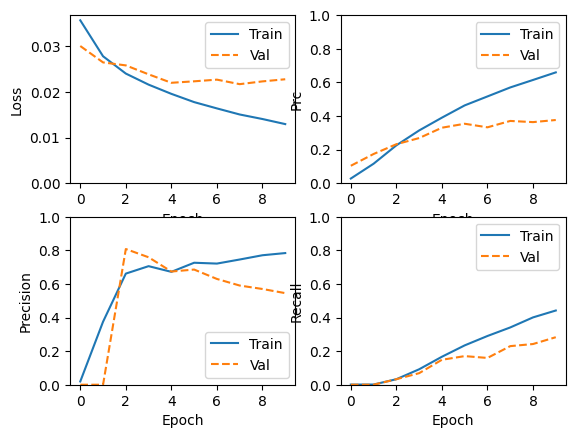

In [203]:
plot_metrics(baseline_history)

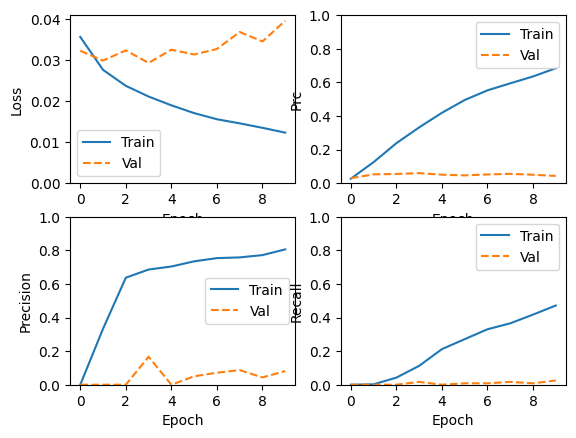

In [204]:
plot_metrics(baseline_history_ctx)

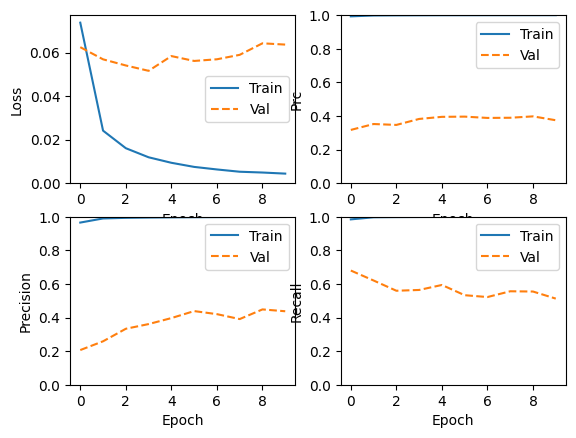

In [205]:
plot_metrics(baseline_history_resample)

Cosine Similarity classifier.

In [206]:
# Make a neural network which simply uses the cosine similarity between the question and the answer as the prediction
def cos_sim(x, y):
    return np.dot(x, y)/(np.linalg.norm(x)*np.linalg.norm(y))



In [207]:
from sklearn.metrics import auc, roc_curve
y_pred_keras = neural_net.predict(X_test).ravel()
y_pred_keras_ctx = neural_net_ctx.predict(X_test_ctx).ravel()
y_pred_keras_resample = neural_net_resample.predict(X_test).ravel()


fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
fpr_keras_ctx, tpr_keras_ctx, thresholds_keras_ctx = roc_curve(y_test_ctx, y_pred_keras_ctx)
fpr_keras_resample, tpr_keras_resample, thresholds_keras_resample = roc_curve(y_test, y_pred_keras_resample)


auc_keras = auc(fpr_keras, tpr_keras)
auc_keras_ctx = auc(fpr_keras_ctx, tpr_keras_ctx)
auc_keras_resample = auc(fpr_keras_resample, tpr_keras_resample)

3165/3165 [==============================] - 6s 2ms/step


In [208]:

y_pred_cos = np.asarray([cos_sim(x, y) for x, y in zip(X_test_q, X_test_c)])
# normalize the cosine similarity to be between 0 and 1
fpr_cos, tpr_cos, thresholds_cos = roc_curve(y_test, y_pred_cos)
auc_cos = auc(fpr_cos, tpr_cos)

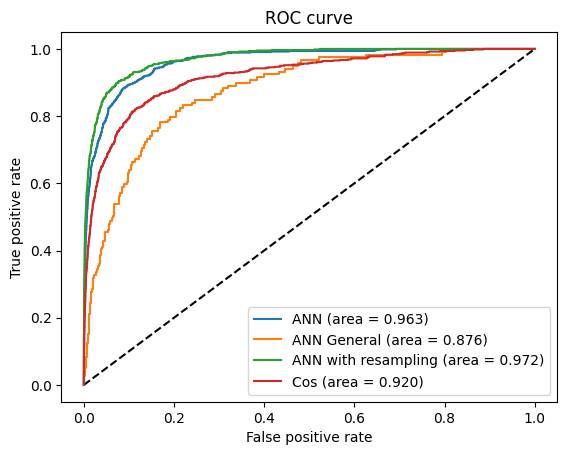

In [209]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='ANN (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_keras_ctx, tpr_keras_ctx, label='ANN General (area = {:.3f})'.format(auc_keras_ctx))
plt.plot(fpr_keras_resample, tpr_keras_resample, label='ANN with resampling (area = {:.3f})'.format(auc_keras_resample))
plt.plot(fpr_cos, tpr_cos, label='Cos (area = {:.3f})'.format(auc_cos))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [397]:
import tensorflow as tf


class WeightedCos(tf.keras.layers.Layer):

    def __init__(self, units = 128, activation=None):
        '''Initializes the class and sets up the internal variables'''

        super(WeightedCos, self).__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        '''Create the state of the layer (weights)'''
        # initialize the weights to be 1s
        w_init = tf.ones_initializer()
        # W should be half the size of the input and it should be a diagonal matrix and it should contain only 1s
        w_init_val = w_init(shape=(int(input_shape[1] / 2), int(input_shape[1] / 2)), dtype='float32')
        self.w = tf.Variable(initial_value=w_init_val, trainable='true')

    def call(self, inputs):
        '''Defines the computation from inputs to outputs'''
        # Take the first half of the input which is U:
        U = inputs[:, :int(inputs.shape[1] / 2)]
        # Take the second half of the input which is V:
        V = inputs[:, int(inputs.shape[1] / 2):]
        # W should be half the size of the input and it should be a diagonal matrix
        # Compute the dot product of U and V and the weights w, which is the numerator of the cosine similarity
        WUV = tf.matmul(U, tf.matmul(self.w, tf.transpose(V)))
        # Square U and V
        U_squared = tf.square(U)
        V_squared = tf.square(V)
        # Compute the dot product of U_squared and V_squared with the weights w
        WU_squared = tf.matmul(U_squared, self.w)
        WV_squared = tf.matmul(V_squared, self.w)
        # take the root of the sum of squares of WUV, WU_squared and WV_squared
        WU_squared_root = tf.sqrt(WU_squared)
        WV_squared_root = tf.sqrt(WV_squared)

        denominator = tf.matmul(WU_squared_root, tf.transpose(WV_squared_root))

        # divide WUV by the denominator
        WUV_div_denominator = WUV / denominator
        return self.activation(WUV_div_denominator)



In [398]:
X_train.shape

(405120, 1536)

In [405]:
model_cos = tf.keras.models.Sequential([
    WeightedCos(128),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [406]:
model_cos.compile(loss='binary_crossentropy', optimizer='adam', metrics=[metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'),
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
      metrics.AUC(name='prc', curve='PR')])

In [ ]:
baseline_history_cos = model_cos.fit(X_train_resample, y_train_resample,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test[:256], y_test[:256]))

Epoch 1/10
1797/6291 [=======>......................] - ETA: 6:23 - loss: 0.7144 - tp: 46659.0000 - fp: 46532.0000 - tn: 68405.0000 - fn: 68420.0000 - accuracy: 0.5002 - precision: 0.5007 - recall: 0.4055 - auc: 0.5018 - prc: 0.5022

In [ ]:
X_train[0].shape